<a href="https://colab.research.google.com/github/Akshat48002/Audify/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import os
import opendatasets as od
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/competitions/cs3244-rossmann-store-sales')

100%|██████████| 7.57M/7.57M [00:00<00:00, 991MB/s]


Extracting archive ./cs3244-rossmann-store-sales/cs3244-rossmann-store-sales.zip to ./cs3244-rossmann-store-sales


In [ ]:
os.listdir('cs3244-rossmann-store-sales')

['test.csv',
 'store.csv',
 'sample_submission.csv',
 'train.csv',
 'test_v2.csv',
 'train_v2.csv']

In [ ]:
ross_df = pd.read_csv('cs3244-rossmann-store-sales/train.csv')
store_df = pd.read_csv('cs3244-rossmann-store-sales/store.csv')

/tmp/ipython-input-8-1769477227.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('cs3244-rossmann-store-sales/train.csv')


In [ ]:
merged_df = ross_df.merge(store_df, on='Store', how='left')

In [ ]:
test_df = pd.read_csv('cs3244-rossmann-store-sales/test_v2.csv')

In [ ]:
test_df.index

RangeIndex(start=0, stop=33450, step=1)

In [ ]:
merged_test_df = test_df.merge(store_df, on='Store', how='left')
merged_test_df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33445,1111,4,2015-07-02,329,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
33446,1112,4,2015-07-02,577,1,1,0,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
33447,1113,4,2015-07-02,793,1,1,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
33448,1114,4,2015-07-02,3784,1,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)
split_date(merged_test_df)

In [ ]:
merged_test_df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,555,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,625,1,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,821,1,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,1498,1,1,0,1,c,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,559,1,1,0,1,a,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33445,1111,4,2015-07-02,329,1,1,0,1,a,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,2,27
33446,1112,4,2015-07-02,577,1,1,0,1,c,c,...,4.0,2006.0,0,NaN,NaN,NaN,2015,7,2,27
33447,1113,4,2015-07-02,793,1,1,0,0,a,c,...,NaN,NaN,0,NaN,NaN,NaN,2015,7,2,27
33448,1114,4,2015-07-02,3784,1,1,0,0,a,c,...,NaN,NaN,0,NaN,NaN,NaN,2015,7,2,27


In [ ]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [ ]:
def comp_months(df):
    df['CompetitionOpen'] = 12*(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x > 0 else 0).fillna(0)

In [ ]:
comp_months(merged_df)
comp_months(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [ ]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
360862,2014-08-20,2950.0,2004.0,10.0,118.0
551829,2014-02-22,100.0,NaN,NaN,0.0
128581,2015-04-07,2060.0,2008.0,10.0,78.0
688846,2013-10-22,1210.0,NaN,NaN,0.0
836490,2013-06-12,450.0,2011.0,6.0,24.0
662073,2013-11-15,2330.0,NaN,NaN,0.0
141596,2015-03-27,1400.0,2012.0,6.0,33.0
413203,2014-06-26,13140.0,NaN,NaN,0.0
352960,2014-08-29,100.0,2015.0,4.0,0.0
962472,2013-02-19,630.0,2015.0,2.0,0.0


In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2',
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


In [ ]:
targets

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1016776,3375
1016827,10765
1016863,5035
1017042,4491


In [ ]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [ ]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,2186
CompetitionOpen,0
Promo2,0
Promo2Open,0
IsPromo2Month,0
Day,0
Month,0


In [ ]:
inputs[categorical_cols].isna().sum()

,0
DayOfWeek,0
StateHoliday,0
StoreType,0
Assortment,0


In [ ]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,90
CompetitionOpen,0
Promo2,0
Promo2Open,0
IsPromo2Month,0
Day,0
Month,0


In [ ]:
max_distance = inputs.CompetitionDistance.max()

In [ ]:
max_distance

75860.0

In [ ]:
inputs['CompetitionDistance'] = inputs['CompetitionDistance'].fillna(max_distance*2)
test_inputs['CompetitionDistance'] = test_inputs['CompetitionDistance'].fillna(max_distance*2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
inputs[['DayOfWeek', 'StateHoliday']] = inputs[['DayOfWeek', 'StateHoliday']].astype(str)
test_inputs[['DayOfWeek', 'StateHoliday']] = test_inputs[['DayOfWeek', 'StateHoliday']].astype(str)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
inputs.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
       'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2', 'Promo2Open',
       'IsPromo2Month', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [ ]:
X = inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [ ]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,0.000000,0.0,1.0,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,0.890710,1.0,1.0,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,0.720856,1.0,1.0,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,0.000000,0.0,1.0,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,0.000000,0.0,1.0,0.545455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.0,1.0,0.000857,0.054834,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.657092,0.0,1.0,0.005537,0.114719,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.689408,0.0,1.0,0.005405,0.000000,1.0,0.016849,1.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,0.850090,0.0,1.0,0.009295,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1,n_estimators=20, max_depth=4)

In [ ]:
model.fit(X,targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
preds = model.predict(X)

In [ ]:
preds

array([ 8073.2007,  7278.4395,  8812.854 , ...,  7913.415 ,  7336.718 ,
       10780.133 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(a,b):
  return np.sqrt(mean_squared_error(a,b))

In [ ]:
rmse(preds,targets)

np.float64(2357.128019433819)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

,feature,importance
1,Promo,0.309244
12,DayOfWeek_1,0.076455
26,StoreType_d,0.071732
24,StoreType_b,0.066487
5,Promo2,0.040490
3,CompetitionDistance,0.039816
27,Assortment_a,0.038316
25,StoreType_c,0.036829
4,CompetitionOpen,0.034157
9,Month,0.026813


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

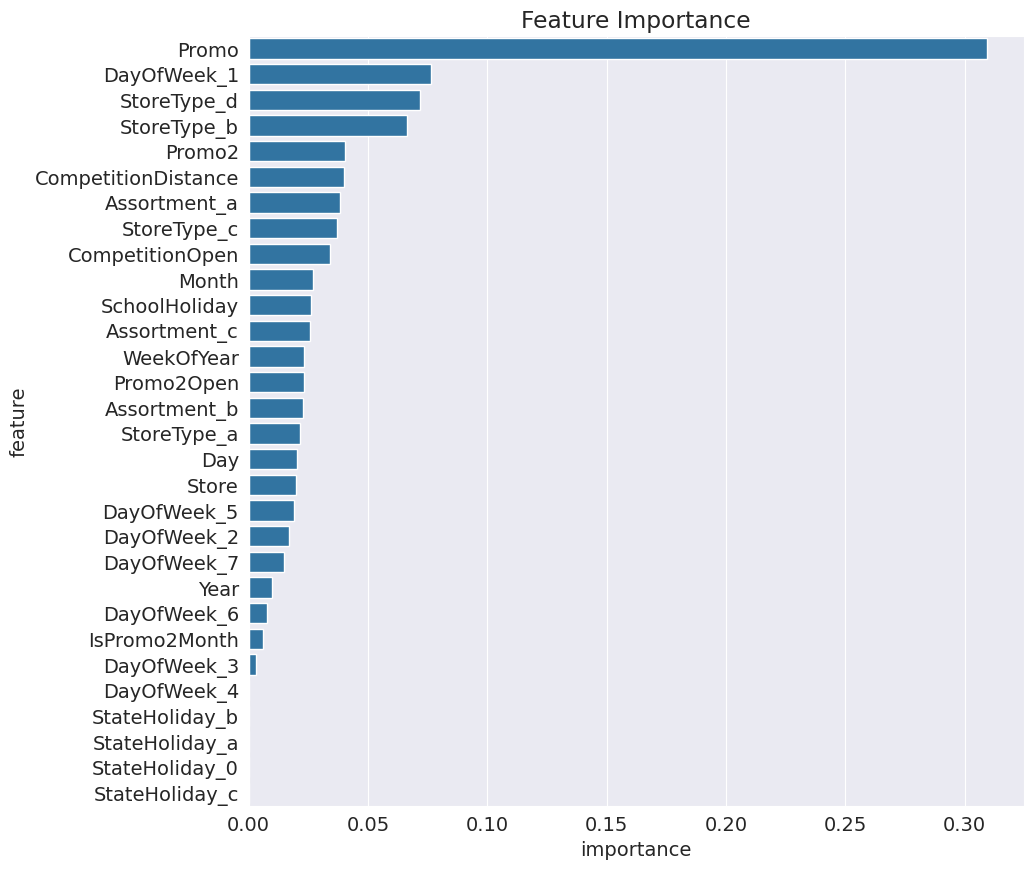

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
sns.barplot(x='importance', y='feature', data=importance_df)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [ ]:
kfold = KFold(n_splits=5,shuffle = True)

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train,
                                                     train_targets,
                                                     X_val,
                                                     val_targets,
                                                     max_depth=4,
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2403.458861724078, Validation RMSE: 2406.128841105563
Train RMSE: 2363.4864078306014, Validation RMSE: 2355.5633084253964
Train RMSE: 2386.461606646962, Validation RMSE: 2395.083610231593
Train RMSE: 2359.9137696110847, Validation RMSE: 2369.0391512172187
Train RMSE: 2404.747076097609, Validation RMSE: 2392.3759110975852


In [ ]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds = predict_avg(models, X)

In [ ]:
preds

array([ 8023.182 ,  7627.423 ,  8336.972 , ...,  7068.585 ,  7743.3154,
       10030.908 ], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,train_targets,val_targets = train_test_split(X,targets,test_size=0.1)

In [ ]:
def test_params(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return train_rmse, val_rmse

In [ ]:
train_errors = []
val_errors = []
complexities = list(range(400, 1000,100))  # This is your x-axis: model complexity

for ne in complexities:
    train_rmse, val_rmse = test_params(n_estimators = ne)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

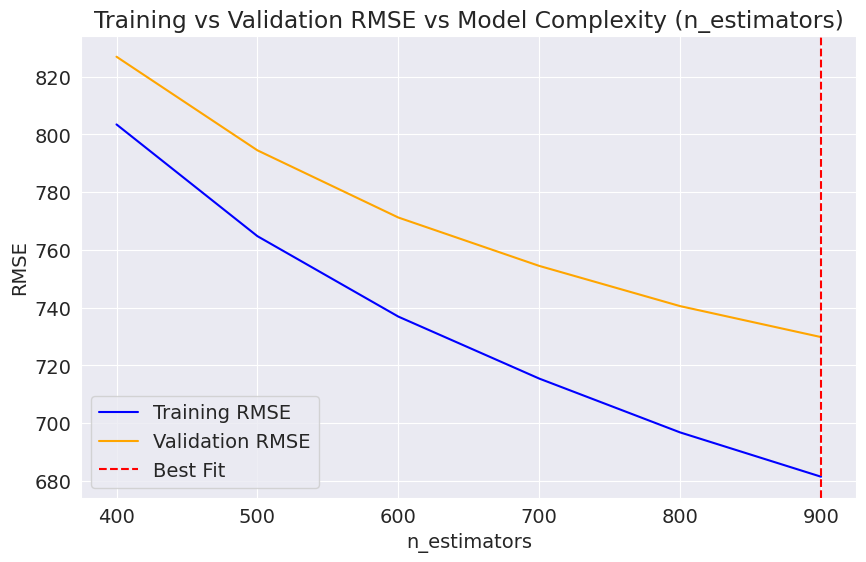

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(complexities, train_errors, label='Training RMSE', color='blue')
plt.plot(complexities, val_errors, label='Validation RMSE', color='orange')
plt.axvline(x=complexities[val_errors.index(min(val_errors))], color='red', linestyle='--', label='Best Fit')

plt.title("Training vs Validation RMSE vs Model Complexity (n_estimators)")
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_params(n_estimators=10)

'Train RMSE: 2365.8767930727076, Validation RMSE: 2376.352877836118'

In [ ]:
test_params(n_estimators=20)

'Train RMSE: 2011.777012991251, Validation RMSE: 2023.1752889949996'

In [ ]:
test_params(n_estimators=100)

'Train RMSE: 1147.9117997476983, Validation RMSE: 1157.0789190889273'

In [ ]:
test_params(n_estimators=240)

'Train RMSE: 901.9986488349082, Validation RMSE: 915.9268188561791'

In [ ]:
test_params(n_estimators=1000,max_depth=10)

(np.float64(299.0859512748802), np.float64(669.1654083632835))

In [ ]:
test_params(n_estimators=1000,max_depth=10,learning_rate=0.5)

(np.float64(233.24918776653865), np.float64(714.2857665178552))

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.2, max_depth=10, subsample=0.9,
                     colsample_bytree=0.7)

In [ ]:
%%time
model.fit(X, targets)

CPU times: user 4min 9s, sys: 963 ms, total: 4min 10s
Wall time: 2min 30s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
submission_df = pd.read_csv('cs3244-rossmann-store-sales/sample_submission.csv')

In [ ]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [ ]:
test_preds = model.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({
    'Id': test_df.index+1,
    'Sales': test_preds
})

In [ ]:
submission_df

,Id,Sales
0,1,5347.385742
1,2,6167.298340
2,3,8479.119141
3,4,13873.140625
4,5,4974.364746
...,...,...
33445,33446,3813.737793
33446,33447,7837.898926
33447,33448,7786.795898
33448,33449,25136.914062


In [ ]:
test_df.Open.isna().sum()

np.int64(0)

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [ ]:
submission_df.sample(50)

,Id,Sales
15654,15655,5705.491699
4940,4941,8297.033203
23802,23803,8757.151367
18731,18732,8257.332031
1973,1974,8259.370117
2175,2176,8555.479492
23695,23696,6107.651367
6746,6747,5801.262695
13788,13789,0.000000
24462,24463,6266.973633


In [ ]:
submission_df.to_csv('submission.csv', index=None)